In [1]:
import pandas as pd

df = pd.read_csv('/content/churn_dataset.csv')
print(df.head())
print(df.describe())
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(df.describe(include='all'))

        customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     7590-VHVEG   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count         

In [4]:
# Check for missing values and data types
print(df.isnull().sum())
print(df.dtypes)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      f

**Conclusion**

In [5]:
# Convert 'TotalCharges' from object to numeric and handle errors

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for any new missing values created by this conversion
print(df['TotalCharges'].isnull().sum())
print(df[df['TotalCharges'].isnull()])

11
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  .

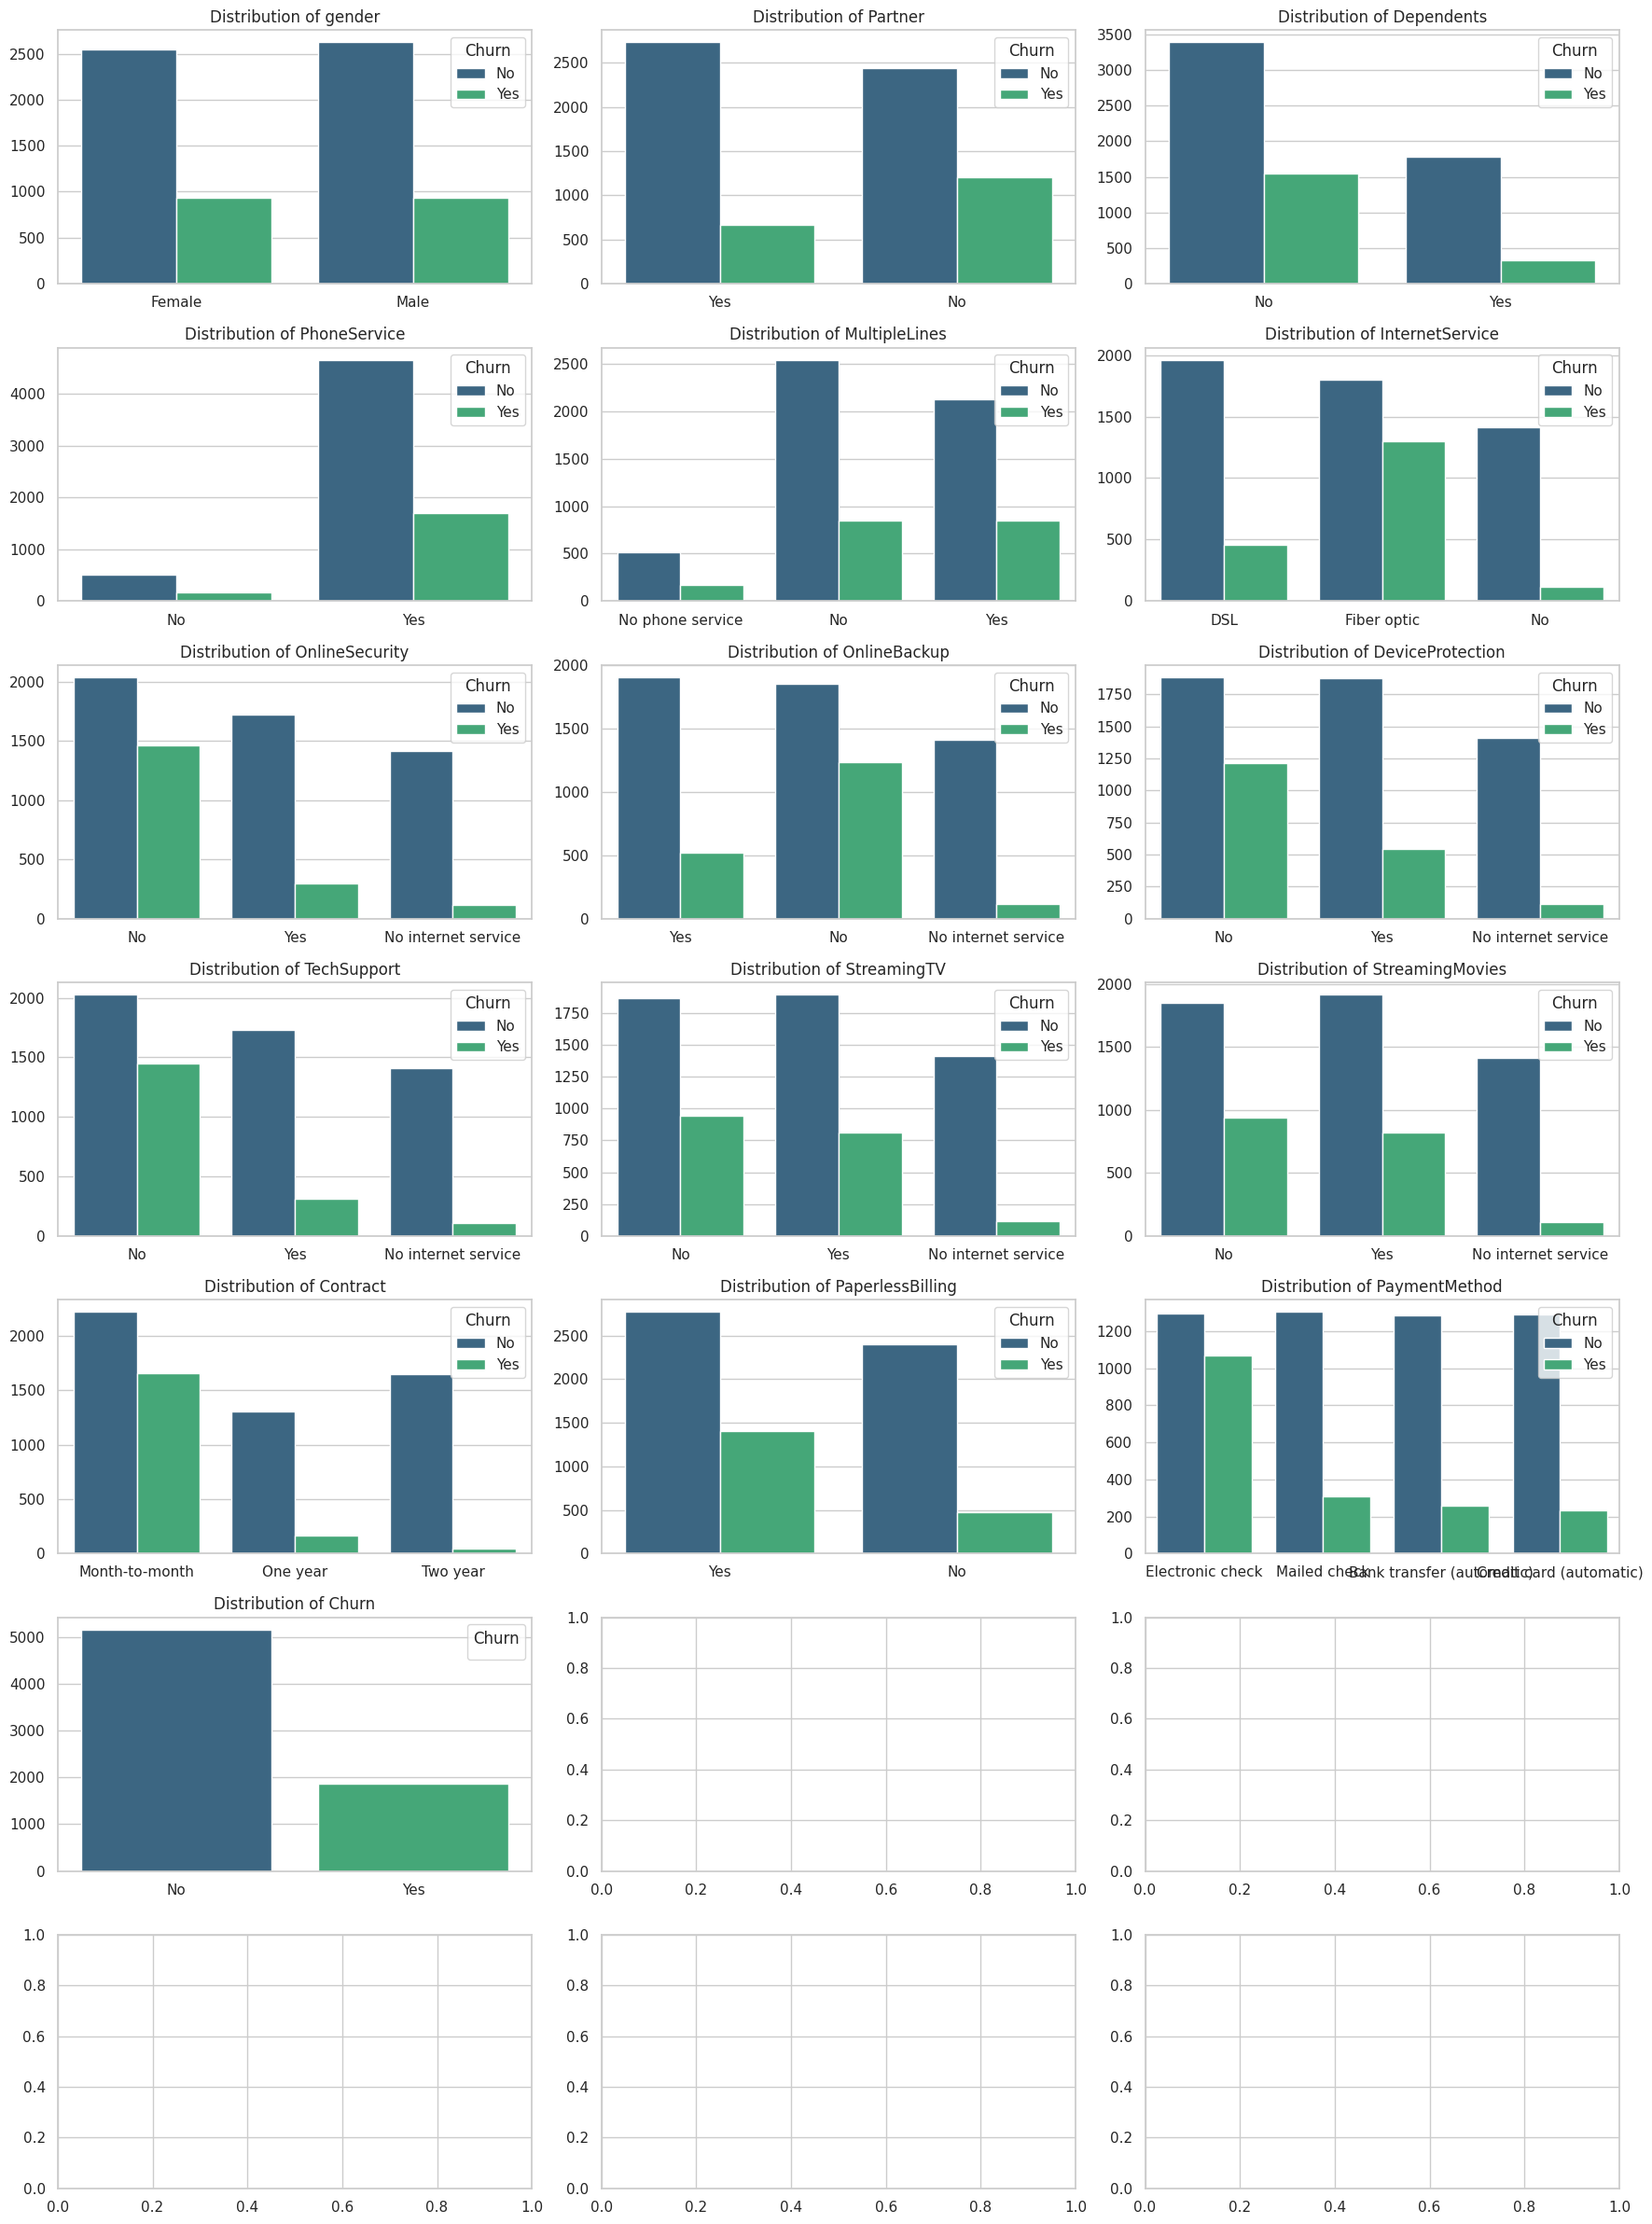

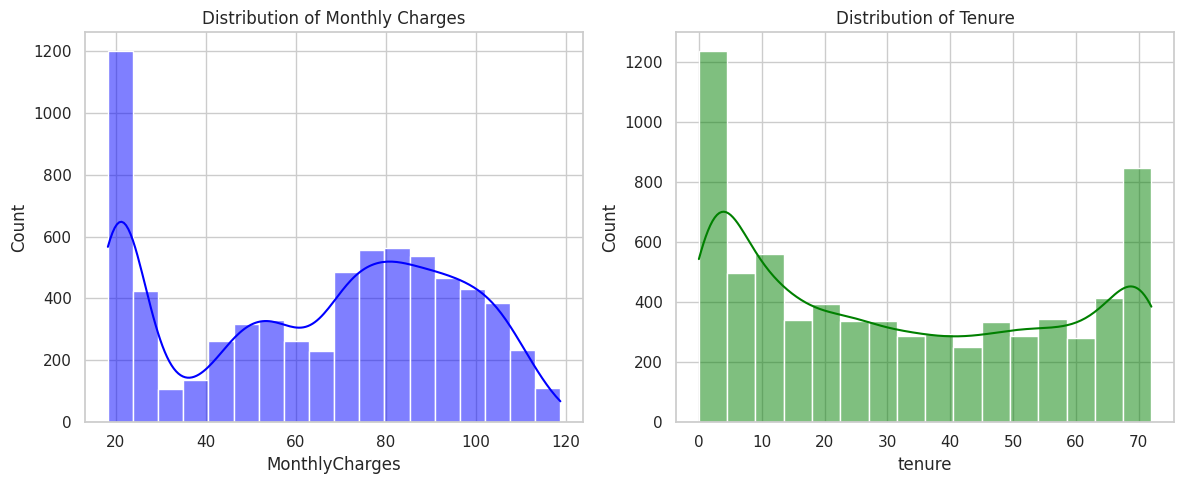

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style='whitegrid')

# Plotting the distribution of each categorical variable
fig, axes = plt.subplots(7, 3, figsize=(18, 24))
axes = axes.flatten()
categorical_columns = df.select_dtypes(include=['object']).columns.drop('customerID')

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i], palette='viridis')
    axes[i].set_title('Distribution of ' + col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

# Displaying the distribution of numerical variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['MonthlyCharges'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Monthly Charges')
sns.histplot(df['tenure'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Tenure')
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

# Displaying the shape of the train and test datasets
print('Training set shape:', train_df.shape)
print('Testing set shape:', test_df.shape)

Training set shape: (5282, 21)
Testing set shape: (1761, 21)


In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Identifying numerical and categorical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Churn')  # Removing target variable from categorical columns

# Creating transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating preprocessing pipelines for both types of data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fitting the transformer on the training data
preprocessor.fit(train_df.drop('Churn', axis=1))

print('Data preparation steps completed for training data.')

Data preparation steps completed for training data.


In [9]:
# Transforming the test data using the fitted preprocessor
X_train_prepared = preprocessor.transform(train_df.drop('Churn', axis=1))
X_test_prepared = preprocessor.transform(test_df.drop('Churn', axis=1))

print('Data preparation steps completed for test data.')

Data preparation steps completed for test data.


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Preparing the target variable
y_train = train_df['Churn']
y_test = test_df['Churn']

# Initializing models
knn = KNeighborsClassifier()
log_reg = LogisticRegression()
svm = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Training models
knn.fit(X_train_prepared, y_train)
log_reg.fit(X_train_prepared, y_train)
svm.fit(X_train_prepared, y_train)
decision_tree.fit(X_train_prepared, y_train)
random_forest.fit(X_train_prepared, y_train)

print('All models have been trained.')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


All models have been trained.


In [22]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train_prepared)

# Transform both the training and test data
X_train_prepared = imputer.transform(X_train_prepared)
X_test_prepared = imputer.transform(X_test_prepared)

In [12]:
print('All models have been trained.')

All models have been trained.


In [24]:
# Fitting the KNeighborsClassifier
knn.fit(X_train_prepared, y_train)

# Calculating accuracy scores
knn_accuracy = accuracy_score(y_test, knn.predict(X_test_prepared))
log_reg_accuracy = accuracy_score(y_test, log_reg.predict(X_test_prepared))
svm_accuracy = accuracy_score(y_test, svm.predict(X_test_prepared))
decision_tree_accuracy = accuracy_score(y_test, decision_tree.predict(X_test_prepared))
random_forest_accuracy = accuracy_score(y_test, random_forest.predict(X_test_prepared))

print('Accuracy scores for each model:')
print('KNN:', knn_accuracy)
print('Logistic Regression:', log_reg_accuracy)
print('SVM:', svm_accuracy)
print('Decision Tree:', decision_tree_accuracy)
print('Random Forest:', random_forest_accuracy)

Accuracy scores for each model:
KNN: 0.7654741624077229
Logistic Regression: 0.8137421919363997
SVM: 0.8063600227143668
Decision Tree: 0.7688813174332766
Random Forest: 0.7847813742191937


In [25]:
# Calculating accuracy scores
knn_accuracy = accuracy_score(y_test, knn.predict(X_test_prepared))
log_reg_accuracy = accuracy_score(y_test, log_reg.predict(X_test_prepared))
svm_accuracy = accuracy_score(y_test, svm.predict(X_test_prepared))
decision_tree_accuracy = accuracy_score(y_test, decision_tree.predict(X_test_prepared))
random_forest_accuracy = accuracy_score(y_test, random_forest.predict(X_test_prepared))

print('Accuracy scores for each model:')
print('KNN:', knn_accuracy)
print('Logistic Regression:', log_reg_accuracy)
print('SVM:', svm_accuracy)
print('Decision Tree:', decision_tree_accuracy)
print('Random Forest:', random_forest_accuracy)

Accuracy scores for each model:
KNN: 0.7654741624077229
Logistic Regression: 0.8137421919363997
SVM: 0.8063600227143668
Decision Tree: 0.7688813174332766
Random Forest: 0.7847813742191937


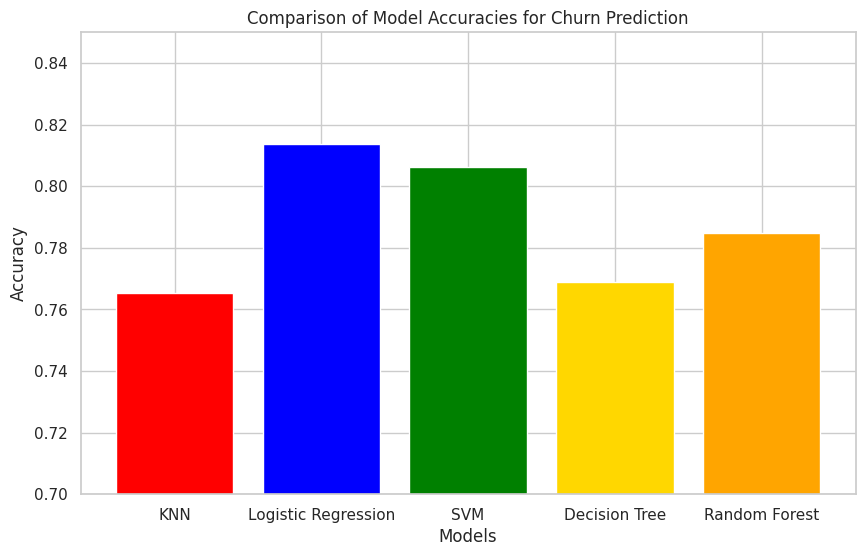

Based on the accuracies achieved, the best algorithm for Churn Prediction is Logistic Regression.


In [26]:
# prompt: Display a plot which shows all the algorithms applied along with the accuracies achieved. Write your conclusion on the best algorithm for Churn Prediction and add colours to the graph

import matplotlib.pyplot as plt
# Model names and corresponding accuracies
model_names = ['KNN', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
accuracies = [knn_accuracy, log_reg_accuracy, svm_accuracy, decision_tree_accuracy, random_forest_accuracy]

# Creating the plot
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(model_names, accuracies, color=['red', 'blue', 'green', 'gold', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies for Churn Prediction')
plt.ylim([0.7, 0.85])  # Adjust y-axis to better visualize differences
plt.show()

# Conclusion based on the results
best_model_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_model_index]

print(f"Based on the accuracies achieved, the best algorithm for Churn Prediction is {best_model_name}.")


In [15]:
# prompt: do same univarite and bi variate analysis on it

import pandas as pd
import matplotlib.pyplot as plt
# **Univariate Analysis**

# Analyzing the distribution of each categorical variable
for col in categorical_cols:
    print(f"**Variable:** {col}")
    print(df[col].value_counts())
    print()

# Analyzing the distribution of each numerical variable
for col in numerical_cols:
    print(f"**Variable:** {col}")
    print(df[col].describe())
    print()

# Further analysis can be done by calculating correlation coefficients, performing ANOVA tests, and creating interaction plots to explore relationships between variables and the target variable.


**Variable:** customerID
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

**Variable:** gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

**Variable:** Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

**Variable:** Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

**Variable:** PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

**Variable:** MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

**Variable:** InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

**Variable:** OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    152

**Variable:** customerID
Churn       No  Yes
customerID         
0002-ORFBO   1    0
0003-MKNFE   1    0
0004-TLHLJ   0    1
0011-IGKFF   0    1
0013-EXCHZ   0    1
...         ..  ...
9987-LUTYD   1    0
9992-RRAMN   0    1
9992-UJOEL   1    0
9993-LHIEB   1    0
9995-HOTOH   1    0

[7043 rows x 2 columns]

**Variable:** gender
Churn     No  Yes
gender           
Female  2549  939
Male    2625  930

**Variable:** Partner
Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669

**Variable:** Dependents
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326

**Variable:** PhoneService
Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699

**Variable:** MultipleLines
Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850

**Variable:** InternetService
Churn              No   Yes
InternetService    

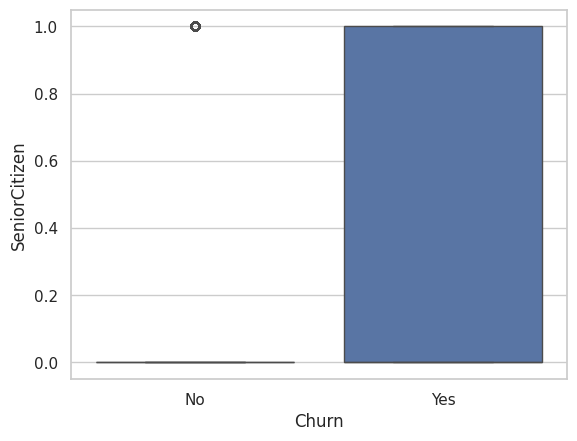


**Variable:** tenure


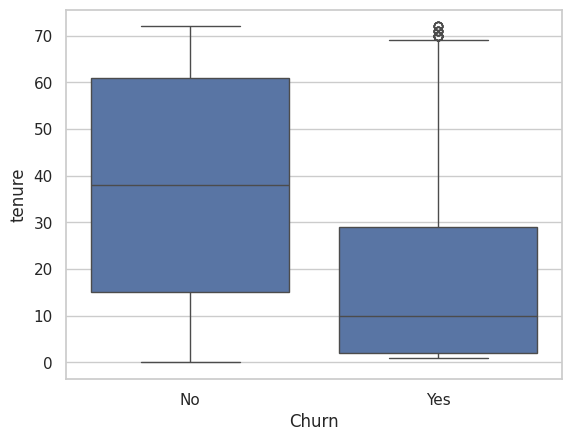


**Variable:** MonthlyCharges


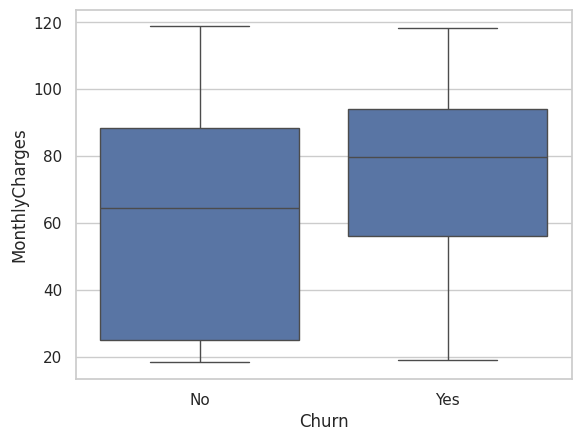


**Variable:** TotalCharges


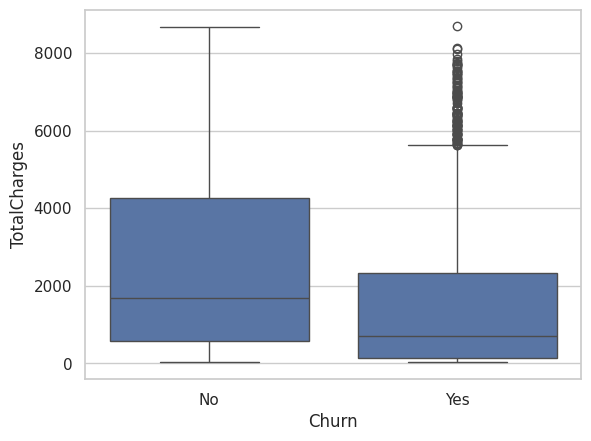

In [16]:
# **Bivariate Analysis**

# Categorical vs. Churn
for col in categorical_cols:
    print(f"**Variable:** {col}")
    print(pd.crosstab(df[col], df['Churn']))
    print()

# Numerical vs. Churn
for col in numerical_cols:
    print(f"**Variable:** {col}")
    sns.boxplot(x='Churn', y=col, data=df)
    plt.show()
    print()